In [105]:
import numpy as np
import pandas as pd
from glob import glob
import os
from os import walk
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

from scipy.stats import ttest_ind

## first load data from TP or DM (need to change paths here)

In [ ]:
clean_path = '../outputs/mapper/HBN/DM/degreelist/'
subject_flist = list(walk(clean_path))[0][2]

In [125]:
sublist_d = []
degree_list = []
degree_mean = []
for s in subject_flist:
    sub=s[:-7]
    sublist_d.append(sub)
    d = np.load(f'{clean_path}{s}')
    degree_list.append( d/max(d) )
    degree_mean.append( (d/max(d)).mean())

In [126]:
clean_path = '../outputs/mapper/HBN/DM/corenesslist/'
subject_flist = list(walk(clean_path))[0][2]
sublist_c = []
coreness_list = []
coreness_mean = []
for s in subject_flist:
    sub=s[:-7]
    sublist_c.append(sub)
    d = np.load(f'{clean_path}{s}')
    coreness_list.append(d)
    coreness_mean.append(d.mean())

In [127]:
#load data
all_dx = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy')
sub_list = np.load('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy')
dx_array = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy')

sub_list = list(sub_list)

In [128]:
len(sub_list)

3615

In [129]:
sub_ids = [s[4:] for s in sublist_d]

dx_count = 0
dne_count = 0

sub_list_w_dx = [] # ru subjects with diagnostic data available
dx_list_w_dx = [] # corresponding list of dx one hot data

for s in sub_ids:
    try:
        ind = sub_list.index(s)
        dx_count = dx_count+1
        sub_list_w_dx.append(sub_list[ind])
        dx_list_w_dx.append(dx_array[ind])
        
    except:
        #print("DNE")
        dne_count=dne_count+1
print(f"no dx data for: {dne_count}")
print(f"dx data for: {dx_count}")

no dx data for: 39
dx data for: 669


In [130]:
list(all_dx).index('Autism Spectrum Disorder')

9

In [131]:
dx_df = pd.DataFrame(dx_list_w_dx)
dx_df.columns = all_dx
dx_sum = dx_df.sum()
print(dx_sum.to_string())

ADHD-Combined Type                                                              152.0
ADHD-Hyperactive/Impulsive Type                                                  22.0
ADHD-Inattentive Type                                                           181.0
Acute Stress Disorder                                                             0.0
Adjustment Disorders                                                             15.0
Agoraphobia                                                                       1.0
Alcohol Use Disorder                                                              1.0
Anorexia Nervosa-Binge Eating/Purging Type                                        1.0
Anorexia Nervosa-Restricting Type                                                 0.0
Autism Spectrum Disorder                                                         93.0
Avoidant/Restrictive Food Intake Disorder                                         1.0
Binge-Eating Disorder                                 

In [132]:
adhd_inds = [0,1,2,58,99]
depression_inds = [27,45,60,74,101]
nt_inds = [50]
asd_inds = [9]

In [133]:
adhd=[]
not_adhd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[0] or d[1] or d[2] or d[58] or d[99]:
        adhd.append(i)
    else:
        not_adhd.append(i)
depression=[]
not_depression=[]
for i,d in enumerate(dx_list_w_dx):
    if d[27] or d[45] or d[60] or d[74] or d[101]:
        depression.append(i)
    else:
        not_depression.append(i)
nt=[]
for i,d in enumerate(dx_list_w_dx):
    if d[50]:
        nt.append(i)
asd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[9]:
        asd.append(i)

In [134]:
adhd_list = np.array(degree_mean)[adhd]
not_adhd_list = np.array(degree_mean)[not_adhd]
depression_list = np.array(degree_mean)[depression]
not_depression_list = np.array(degree_mean)[not_depression]
nt_list =  np.array(degree_mean)[nt]
asd_list =  np.array(degree_mean)[asd]

len(asd_list)

93

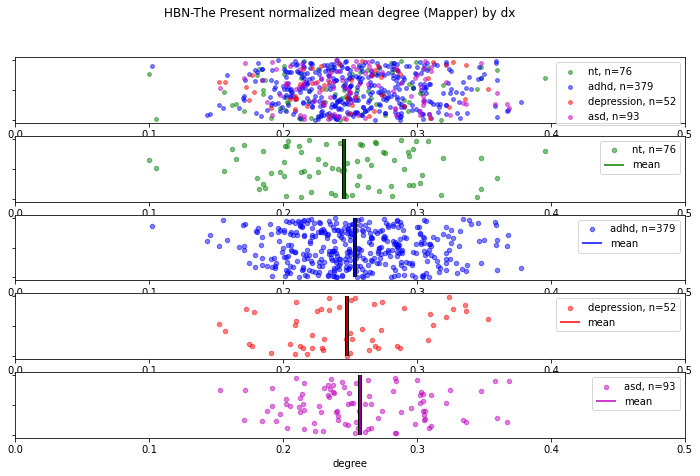

In [135]:
fig, axs = plt.subplots(5,figsize=(12,7))
# fig.suptitle('HBN RU 3-8 degree (Mapper) by dx')
fig.suptitle('HBN-The Present normalized mean degree (Mapper) by dx')
#fig.suptitle('HBN-Despicable Me normalized mean degree (Mapper) by dx')

nt_label = f'nt, n={len(nt_list)}'
adhd_label = f'adhd, n={len(adhd_list)}'
depression_label = f'depression, n={len(depression_list)}'
asd_label = f'asd, n={len(asd_list)}'

axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label=nt_label,c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label=adhd_label,c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label=depression_label,c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label=asd_label,c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,0.5)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label=nt_label,c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,0.5)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label=adhd_label,c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,0.5)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label=depression_label,c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,0.5)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('degree')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label=asd_label,c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,0.5)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('degree')
axs[4].legend()


In [136]:
ttest_ind(nt_list, adhd_list)

Ttest_indResult(statistic=-1.4038157693395663, pvalue=0.16105887202342878)

## make a version where subjects are only in one group

In [137]:
adhd_inds = [0,1,2,58,99]
depression_inds = [27,45,60,74,101]
nt_inds = [50]
asd_inds = [9]

In [71]:
adhd=[]
not_adhd=[]
for i,d in enumerate(dx_list_w_dx):
    if (d[0] or d[1] or d[2] or d[58] or d[99]) and not (d[27] or d[45] or d[60] or d[74] or d[101]) and not d[50] and not d[9]:
        adhd.append(i)
    else:
        not_adhd.append(i)
depression=[]
not_depression=[]
for i,d in enumerate(dx_list_w_dx):
    if (d[27] or d[45] or d[60] or d[74] or d[101]) and not (d[0] or d[1] or d[2] or d[58] or d[99]) and not d[50] and not d[9] :
        depression.append(i)
    else:
        not_depression.append(i)
nt=[]
for i,d in enumerate(dx_list_w_dx):
    if d[50] and not (d[0] or d[1] or d[2] or d[58] or d[99]) and not (d[27] or d[45] or d[60] or d[74] or d[101]) and not d[9] :
        nt.append(i)
asd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[9] and not (d[0] or d[1] or d[2] or d[58] or d[99]) and not (d[27] or d[45] or d[60] or d[74] or d[101]) and not d[50]:
        asd.append(i)

In [72]:
adhd_list = np.array(degree_mean)[adhd]
not_adhd_list = np.array(degree_mean)[not_adhd]
depression_list = np.array(degree_mean)[depression]
not_depression_list = np.array(degree_mean)[not_depression]
nt_list =  np.array(degree_mean)[nt]
asd_list =  np.array(degree_mean)[asd]

len(asd_list)




17

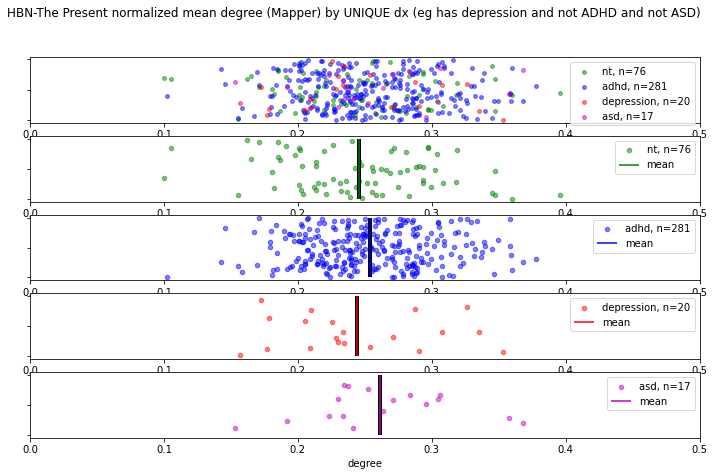

In [73]:
fig, axs = plt.subplots(5,figsize=(12,7))
fig.suptitle('HBN-The Present normalized mean degree (Mapper) by UNIQUE dx (eg has depression and not ADHD and not ASD)')
nt_label = f'nt, n={len(nt_list)}'
adhd_label = f'adhd, n={len(adhd_list)}'
depression_label = f'depression, n={len(depression_list)}'
asd_label = f'asd, n={len(asd_list)}'

axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label=nt_label,c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label=adhd_label,c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label=depression_label,c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label=asd_label,c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,0.5)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label=nt_label,c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,0.5)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label=adhd_label,c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,0.5)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label=depression_label,c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,0.5)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('degree')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label=asd_label,c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,0.5)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('degree')
axs[4].legend()


In [74]:
ttest_ind(depression_list, asd_list)

Ttest_indResult(statistic=-0.4993068892039096, pvalue=0.6201083812319717)

## make a version with only primary disorders

In [88]:
adhd_inds = [0,1,2,58,99]
depression_inds = [27,45,60,74,101]
nt_inds = [50]
asd_inds = [9]

In [89]:
adhd=[]
not_adhd=[]
for i,d in enumerate(dx_list_w_dx):
    if (d[0] or d[1] or d[2] or d[58] or d[99]) and d[0]+d[1]+d[2]+d[58]+d[99]-d.sum()==0 :
        adhd.append(i)
    else:
        not_adhd.append(i)
depression=[]
not_depression=[]
for i,d in enumerate(dx_list_w_dx):
    if (d[27] or d[45] or d[60] or d[74] or d[101]) and d[27]+d[45]+d[60]+d[74]+d[101]-d.sum()==0:
        depression.append(i)
    else:
        not_depression.append(i)
nt=[]
for i,d in enumerate(dx_list_w_dx):
    if d[50] and d[50]-d.sum()==0:
        nt.append(i)
asd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[9] and d[9]-d.sum()==0:
        asd.append(i)

In [90]:
adhd_list = np.array(degree_mean)[adhd]
not_adhd_list = np.array(degree_mean)[not_adhd]
depression_list = np.array(degree_mean)[depression]
not_depression_list = np.array(degree_mean)[not_depression]
nt_list =  np.array(degree_mean)[nt]
asd_list =  np.array(degree_mean)[asd]

len(asd_list)




9

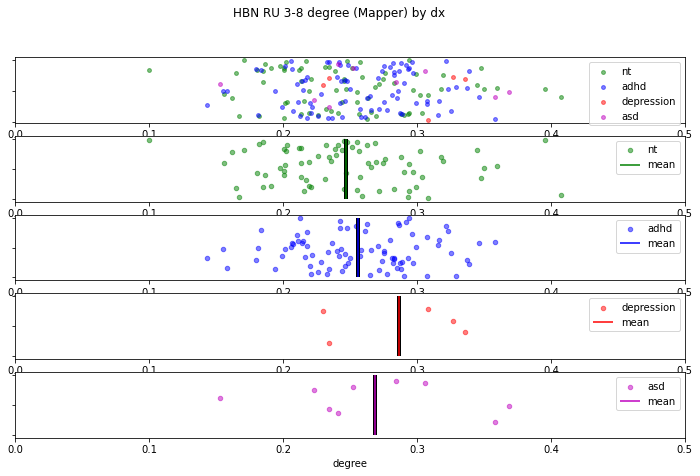

In [70]:
fig, axs = plt.subplots(5,figsize=(12,7))
fig.suptitle('HBN RU 3-8 degree (Mapper) by dx')
axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label='nt',c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label='adhd',c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label='depression',c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label='asd',c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,0.5)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label='nt',c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,0.5)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label='adhd',c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,0.5)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label='depression',c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,0.5)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('degree')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label='asd',c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,0.5)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('degree')
axs[4].legend()


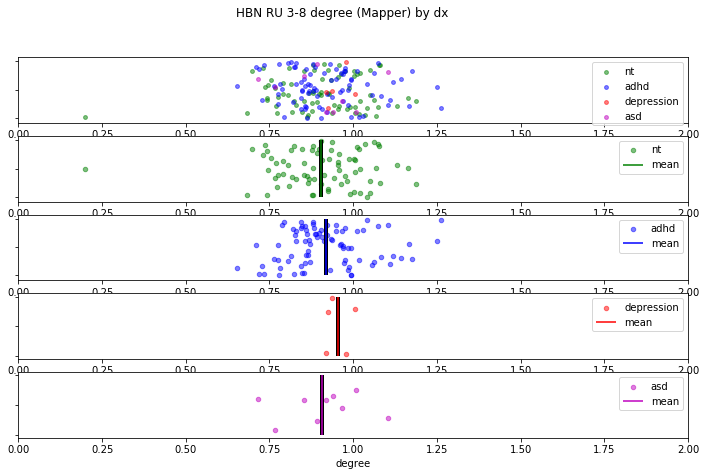

In [38]:
fig, axs = plt.subplots(5,figsize=(12,7))
fig.suptitle('HBN RU 3-8 degree (Mapper) by dx')
axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label='nt',c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label='adhd',c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label='depression',c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label='asd',c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,2)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label='nt',c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,2)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label='adhd',c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,2)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label='depression',c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,2)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('degree')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label='asd',c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,2)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('degree')
axs[4].legend()


## plot degree lists

In [152]:
adhd_list = np.array(degree_list)[adhd]
not_adhd_list = np.array(degree_list)[not_adhd]
depression_list = np.array(degree_list)[depression]
not_depression_list = np.array(degree_list)[not_depression]
nt_list =  np.array(degree_list)[nt]
asd_list =  np.array(degree_list)[asd]

len(asd_list)


<ipython-input-152-0ff9679bb497>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adhd_list = np.array(degree_list)[adhd]
<ipython-input-152-0ff9679bb497>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  not_adhd_list = np.array(degree_list)[not_adhd]
<ipython-input-152-0ff9679bb497>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dep

93

In [139]:
from scipy.stats import sem

In [140]:
nt_list.shape

(76,)

In [141]:
def plot_degree(list_in,title):
    list_in = [n for n in list_in if len(n)==750]
#     list_in = [n for n in list_in if len(n)==250]

    degree_list = np.array(list_in)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


    for d in degree_list:
#        if len(d) == 250:
        if len(d) == 750:
            plt.plot(d,linewidth=0.5)

    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,y,label='mean degree',c='k',linewidth=2)
    plt.fill_between(x, y-error, y+error, label = 'sem degree',edgecolor='k', facecolor='gray')
    plt.ylabel('degree')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')

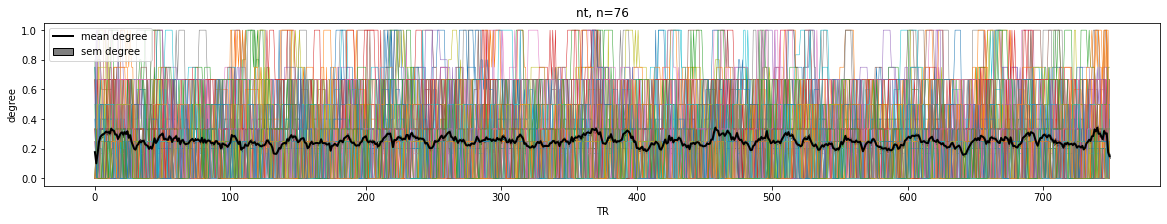

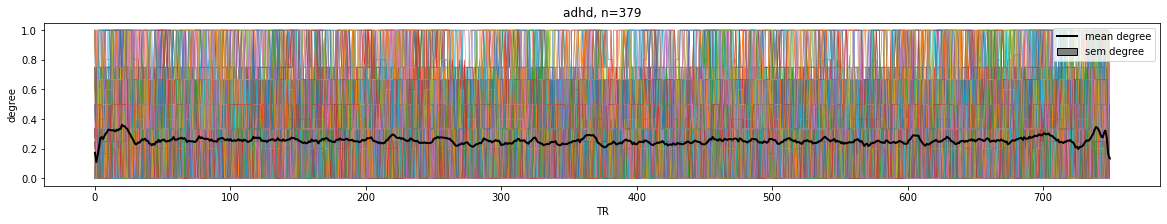

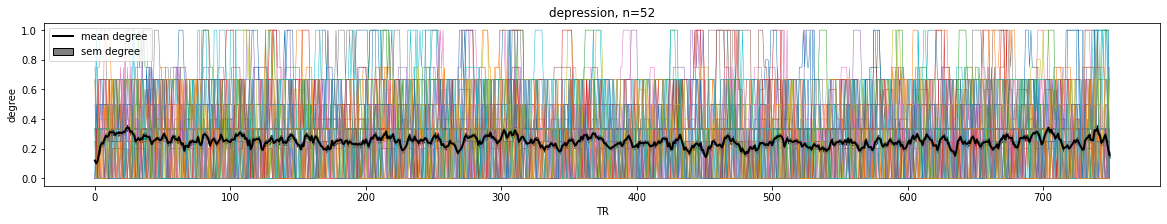

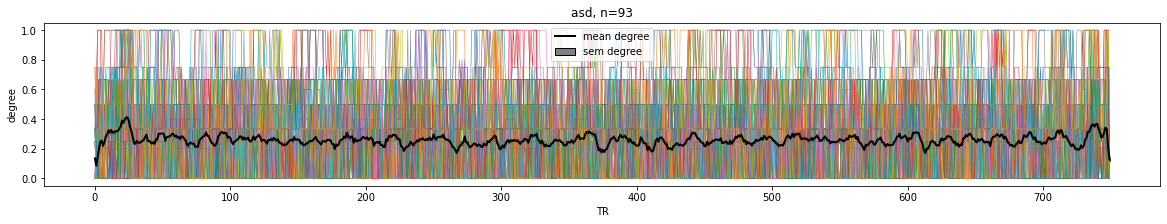

In [142]:
nt_label = f'nt, n={len(nt_list)}'
adhd_label = f'adhd, n={len(adhd_list)}'
depression_label = f'depression, n={len(depression_list)}'
asd_label = f'asd, n={len(asd_list)}'

plot_degree(nt_list,nt_label)
plot_degree(adhd_list,adhd_label)
plot_degree(depression_list,depression_label)
plot_degree(asd_list,asd_label)

## plot mean coreness

In [103]:
adhd_list = np.array(coreness_mean)[adhd]
not_adhd_list = np.array(coreness_mean)[not_adhd]
depression_list = np.array(coreness_mean)[depression]
not_depression_list = np.array(coreness_mean)[not_depression]
nt_list =  np.array(coreness_mean)[nt]
asd_list =  np.array(coreness_mean)[asd]

len(asd_list)




115

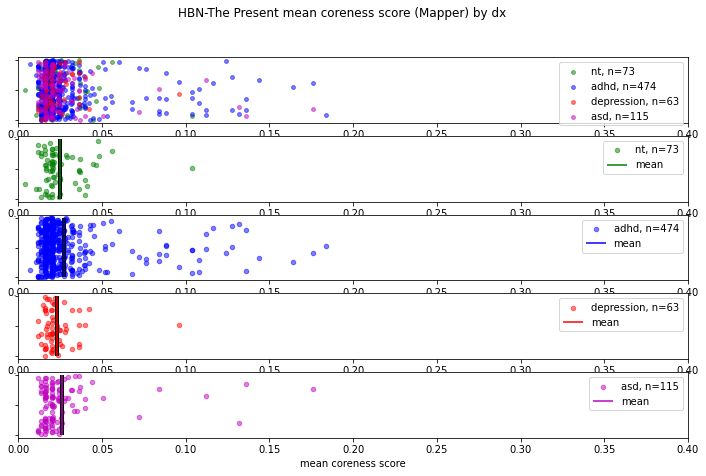

In [104]:
fig, axs = plt.subplots(5,figsize=(12,7))
fig.suptitle('HBN-The Present mean coreness score (Mapper) by dx')
#fig.suptitle('HBN-Despicable Me mean coreness score (Mapper) by dx')

nt_label = f'nt, n={len(nt_list)}'
adhd_label = f'adhd, n={len(adhd_list)}'
depression_label = f'depression, n={len(depression_list)}'
asd_label = f'asd, n={len(asd_list)}'
axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label=nt_label,c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label=adhd_label,c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label=depression_label,c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label=asd_label,c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,0.4)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label=nt_label,c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,0.4)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label=adhd_label,c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,0.4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label=depression_label,c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,0.4)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('coreness')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label=asd_label,c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,0.4)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('mean coreness score')
axs[4].legend()

In [81]:
def plot_coreness(list_in,title):
#    list_in = [n for n in list_in if len(n)==250]
    list_in = [n for n in list_in if len(n)==750]
    degree_list = np.array(list_in)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


    for d in degree_list:
#        if len(d) == 250:
        if len(d) == 750:
            plt.plot(d,linewidth=0.5)

    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,y,label='mean coreness score',c='k',linewidth=2)
    plt.fill_between(x, y-error, y+error, label = 'sem coreness',edgecolor='k', facecolor='gray')
    plt.ylabel('coreness')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')

## plot coreness lists

In [82]:
adhd_list = np.array(coreness_list)[adhd]
not_adhd_list = np.array(coreness_list)[not_adhd]
depression_list = np.array(coreness_list)[depression]
not_depression_list = np.array(coreness_list)[not_depression]
nt_list =  np.array(coreness_list)[nt]
asd_list =  np.array(coreness_list)[asd]

len(asd_list)


<ipython-input-82-c11f62ccfd4d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adhd_list = np.array(coreness_list)[adhd]
<ipython-input-82-c11f62ccfd4d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  not_adhd_list = np.array(coreness_list)[not_adhd]
<ipython-input-82-c11f62ccfd4d>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  de

17

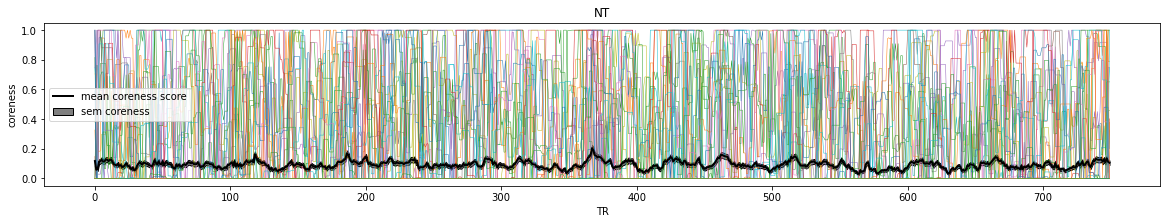

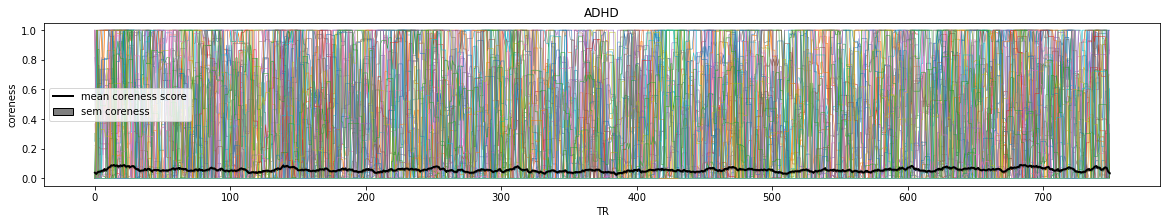

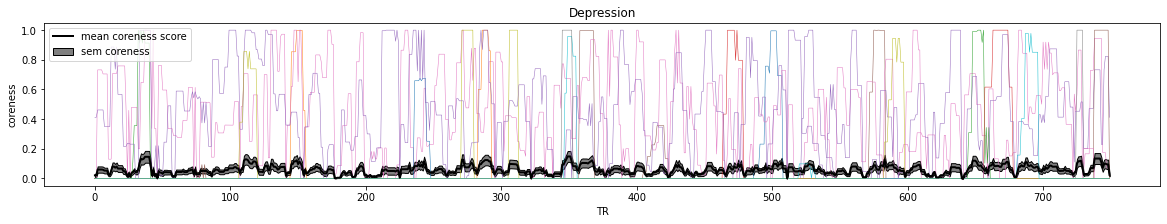

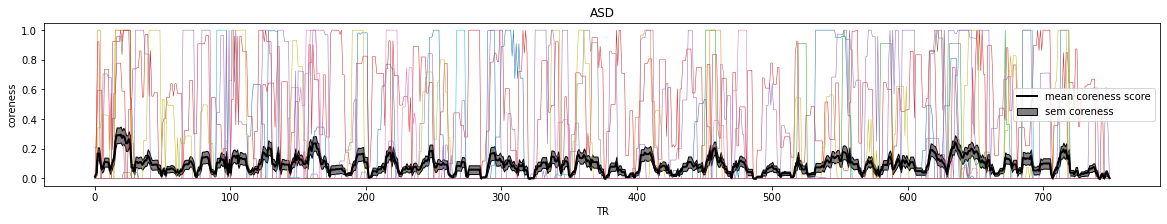

In [83]:
plot_coreness(nt_list,'NT')
plot_coreness(adhd_list,'ADHD')
plot_coreness(depression_list,'Depression')
plot_coreness(asd_list,'ASD')

## Train a classifier (first load the degree lists and not other lists)

In [162]:
print(nt_list.shape,depression_list.shape)

(76,) (52,)


In [163]:
clf_nt_list=nt_list[0:52]

In [164]:
clf_nt_list.shape

(52,)

In [166]:
y=np.ones(104)
y[0:52]=0
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifierCV
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

In [173]:
np.as_array(nt_list).shape

AttributeError: module 'numpy' has no attribute 'as_array'